In [14]:
# go to the root directory
%cd ../
import os

assert os.path.exists('./trainers/trainer.py')

D:\repos\701-simplicity-bias


In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
from synthetic_data.linear_slabs import generate_lms_array, visualize_lms_array, save_arrays, load_arrays

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## $LMS-5, MS-(5,7), \hat{LMS}-7$

In [10]:
data_config = dict(
    num_samples=110000,
    num_dim=50,
    margins=0.1,
    width=1.0,
    random_orthonormal_transform=True
)

lms_5_data_config = data_config | {'slabs': np.array([2] + [5] * 49), 'noise_proportions': 0}
ms_57_data_config = data_config | {'slabs': np.array([5] + [7] * 49), 'noise_proportions': 0}
lms_7_noisy_data_config = data_config | {'slabs': np.array([2] + [7] * 49),
                                         'noise_proportions': np.array([0.1] + [0] * 49)}

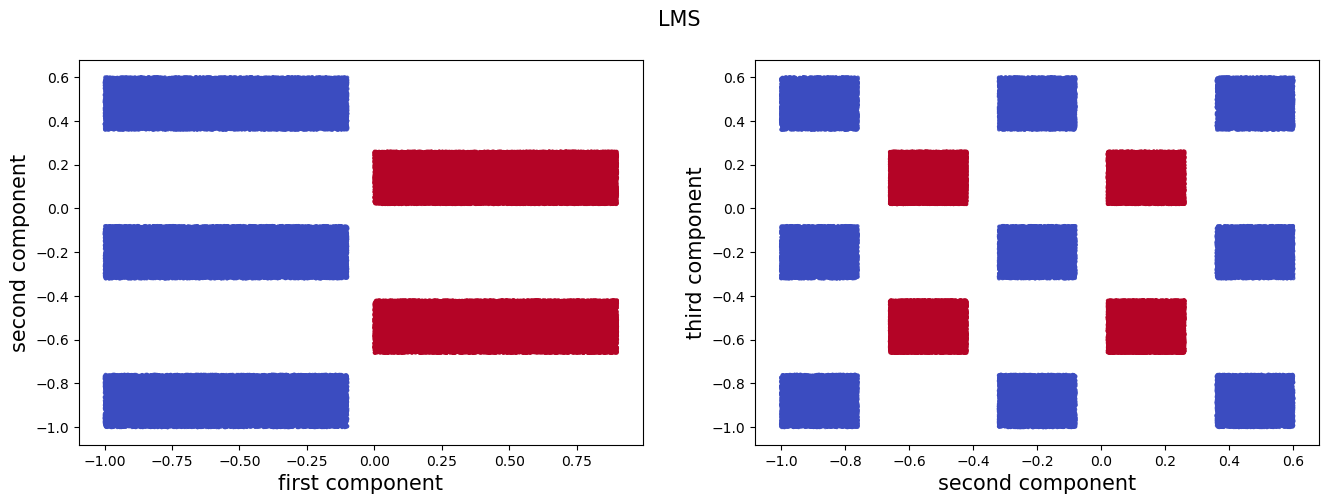

In [17]:
lms_5_data = generate_lms_array(**lms_5_data_config)
visualize_lms_array(*lms_5_data)

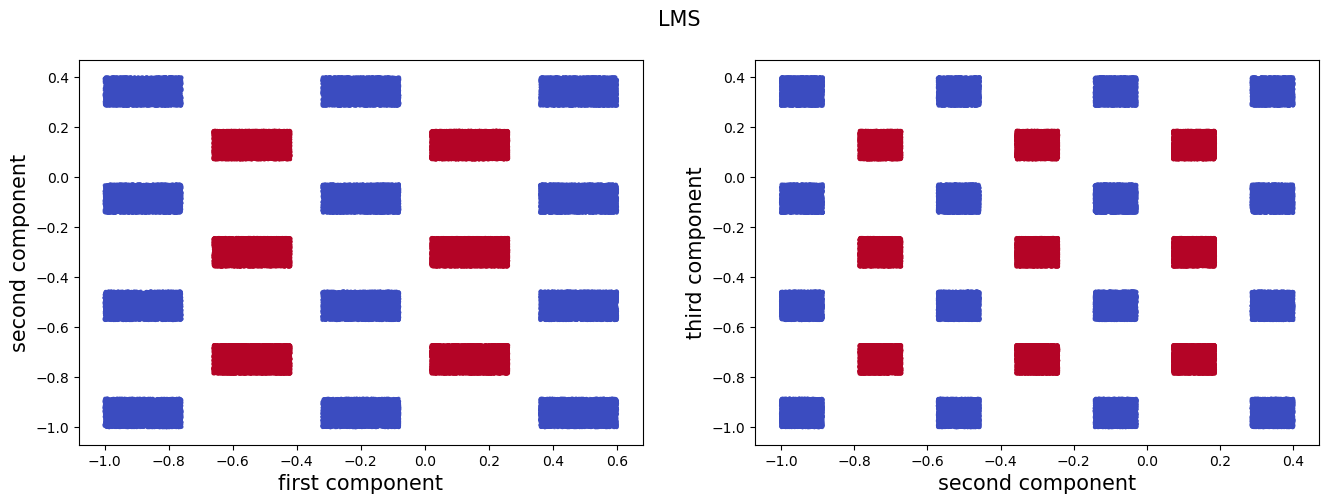

In [18]:
ms_57_data = generate_lms_array(**ms_57_data_config)
visualize_lms_array(*ms_57_data)

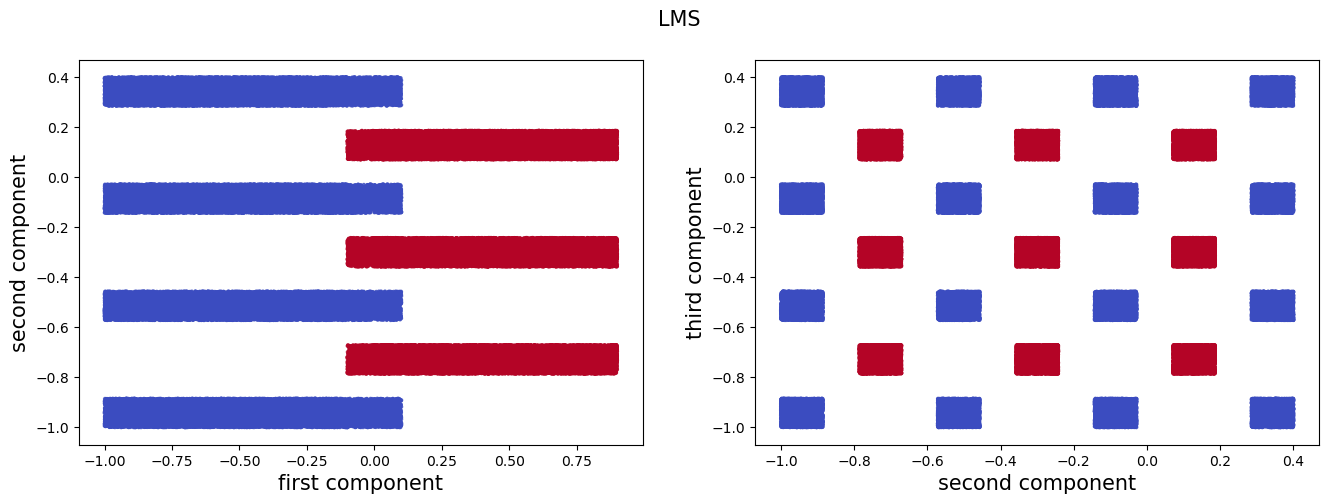

In [19]:
lms_7_noisy_data = generate_lms_array(**lms_7_noisy_data_config)
visualize_lms_array(*lms_7_noisy_data)

In [25]:
#@title train/val split and save linear data
os.makedirs('./data', exist_ok=True)
data_dir = os.path.abspath('./data')
print('Saving Data to {}'.format(data_dir))
train_size = 100000
for name, data in [
    ('lms_5', lms_5_data),
    ('ms_57', ms_57_data),
    ('lms_7_noisy', lms_7_noisy_data)
]:
    x, y, w = data
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    save_arrays(os.path.join(data_dir, f'{name}_train.npz'), x[:train_size], y[:train_size], w)
    save_arrays(os.path.join(data_dir, f'{name}_val.npz'), x[train_size:], y[train_size:], w)

Saving Data to D:\repos\701-simplicity-bias\data


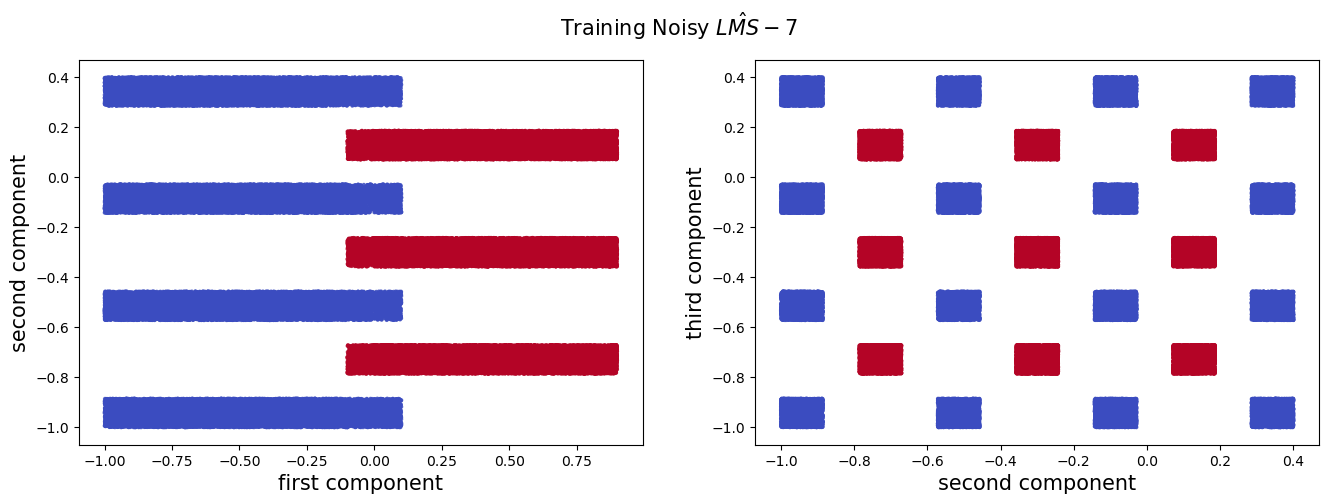

In [30]:
#@title test loading data
loaded_lms7_train, w = load_arrays(os.path.join(data_dir, 'lms_7_noisy_train.npz'))
x, y = loaded_lms7_train.tensors
x = x.numpy()
y = y.numpy()
visualize_lms_array(x, y, w, title=r'Training Noisy $\hat{LMS}-7$')